In [1]:
import os
import glob
import gdown 
import zipfile
import shutil

def download_data(save_folder, dataset_name="salaries"):
    dataset_list = ["salaries", "exams", "college", "cars", "mall"]
    assert dataset_name in dataset_list, f"Choose one of the available datasets: {dataset_list}"

    file_ids = {
        "college": "1vwfMpQ4ikAI91zn1bWxP_Iqz7DTFUA9F",
        "salaries": "1p-XtX29fgXT9CzBfpHm3t8r028gQPRhe",
        "exams": "1TYN_sRmauaDgNYgQ-0VSHVAJvLoxKx2R",
        "cars": "1Fi5IPdfEktnKyf3dyHmnh84a2jiXl33A",
        "mall": "1eGWJVRNmGjfaH0o3dczBbNe_-RrW0_Jm",
    }

    file_id = file_ids[dataset_name]
    zip_path = os.path.join(save_folder, f"{dataset_name}.zip")
    csv_path = os.path.join(save_folder, f"{dataset_name}.csv")

    os.makedirs(save_folder, exist_ok=True)

    if os.path.isfile(csv_path):
        print(f"{dataset_name}.csv is already downloaded.")
        return

    print(f"⬇️ Downloading dataset: {dataset_name}...")

    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, zip_path, quiet=False)

    if not os.path.exists(zip_path):
        print("Error: ZIP file was not downloaded!")
        return
    if not zipfile.is_zipfile(zip_path):
        print("Error: The downloaded file is not a valid ZIP! Check the Google Drive link.")
        return

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(save_folder)

    os.remove(zip_path)

    extracted_files = glob.glob(os.path.join(save_folder, "*"))
    
    if not extracted_files:
        print("Error: No files were extracted! Check if the ZIP contains a subfolder.")
        return

    if len(extracted_files) == 1 and os.path.isdir(extracted_files[0]):
        extracted_files = glob.glob(os.path.join(extracted_files[0], "*"))

    csv_files = [f for f in extracted_files if f.endswith(".csv")]

    if not csv_files:
        print("Error: No CSV files found after extraction!")
        return

    latest_csv = max(csv_files, key=os.path.getctime)
    shutil.move(latest_csv, csv_path)

    print(f" {dataset_name}.csv successfully downloaded and saved.")

download_data("datasets", "college")
download_data("datasets", "exams")
download_data("datasets", "cars")
download_data("datasets", "mall")

⬇️ Downloading dataset: college...


Downloading...
From: https://drive.google.com/uc?id=1vwfMpQ4ikAI91zn1bWxP_Iqz7DTFUA9F
To: c:\Users\user\Desktop\ml1\datasets\college.zip
100%|██████████| 32.4k/32.4k [00:00<00:00, 322kB/s]


 college.csv successfully downloaded and saved.
⬇️ Downloading dataset: exams...


Downloading...
From: https://drive.google.com/uc?id=1TYN_sRmauaDgNYgQ-0VSHVAJvLoxKx2R
To: c:\Users\user\Desktop\ml1\datasets\exams.zip
100%|██████████| 8.91k/8.91k [00:00<00:00, 447kB/s]


 exams.csv successfully downloaded and saved.
⬇️ Downloading dataset: cars...


Downloading...
From: https://drive.google.com/uc?id=1Fi5IPdfEktnKyf3dyHmnh84a2jiXl33A
To: c:\Users\user\Desktop\ml1\datasets\cars.zip
100%|██████████| 4.78k/4.78k [00:00<00:00, 289kB/s]


 cars.csv successfully downloaded and saved.
⬇️ Downloading dataset: mall...


Downloading...
From: https://drive.google.com/uc?id=1eGWJVRNmGjfaH0o3dczBbNe_-RrW0_Jm
To: c:\Users\user\Desktop\ml1\datasets\mall.zip
100%|██████████| 1.58k/1.58k [00:00<00:00, 2.32MB/s]

 mall.csv successfully downloaded and saved.


In [19]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

In [ ]:
import os
print(os.listdir())

['.git', 'datasets', 'ml.ipynb', 'my_folder']


In [27]:
df = pd.read_csv("datasets/cars.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [28]:
df = pd.read_csv("datasets/mall.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
#Load dataset (Change file name as needed)
df = pd.read_csv("datasets/salaries.csv")  
# Display first 5 rows
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [ ]:
#last five rows
df.tail()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
11082,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
11083,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
11084,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
11085,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large
11086,Data Scientist,Senior-level,Full-time,On-site,2020,Austria,80000,EUR,91237,Austria,Small


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11087 entries, 0 to 11086
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           11087 non-null  object
 1   experience_level    11087 non-null  object
 2   employment_type     11087 non-null  object
 3   work_models         11087 non-null  object
 4   work_year           11087 non-null  int64 
 5   employee_residence  11087 non-null  object
 6   salary              11087 non-null  int64 
 7   salary_currency     11087 non-null  object
 8   salary_in_usd       11087 non-null  int64 
 9   company_location    11087 non-null  object
 10  company_size        11087 non-null  object
dtypes: int64(3), object(8)
memory usage: 952.9+ KB


In [35]:
#Summary statistics of numerical columns
df.describe()

,work_year,salary,salary_in_usd
count,11087.000000,1.108700e+04,11087.000000
mean,2022.848381,1.695723e+05,149614.977631
std,0.567803,4.080311e+05,66704.329347
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,1.050000e+05,104000.000000
50%,2023.000000,1.422000e+05,142000.000000
75%,2023.000000,1.880500e+05,185900.000000
max,2024.000000,3.040000e+07,750000.000000


In [36]:
# Check for missing values
df.isnull().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

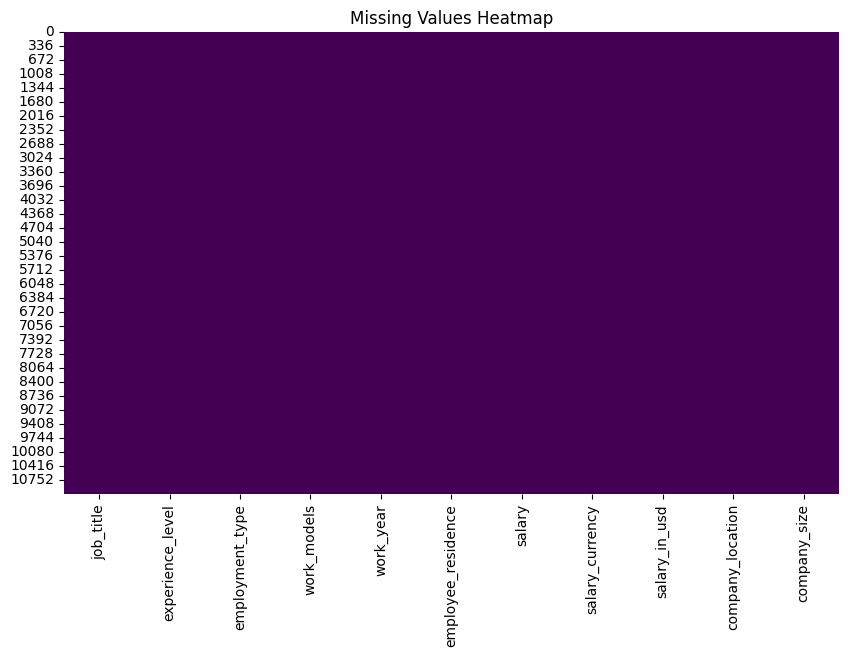

In [37]:
#Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [38]:
#Shape and column names
print(f"Dataset Shape: {df.shape}")
print("\nColumn Names:", df.columns.tolist())

Dataset Shape: (11087, 11)

Column Names: ['job_title', 'experience_level', 'employment_type', 'work_models', 'work_year', 'employee_residence', 'salary', 'salary_currency', 'salary_in_usd', 'company_location', 'company_size']


In [39]:
#Check for duplicate rows
df.duplicated().sum()

np.int64(4488)

In [42]:
print(df.dtypes)


job_title             object
experience_level      object
employment_type       object
work_models           object
work_year              int64
employee_residence    object
salary                 int64
salary_currency       object
salary_in_usd          int64
company_location      object
company_size          object
dtype: object


In [43]:
df_numeric = df.select_dtypes(include=["number"])  # Select only numerical columns
print(df_numeric.head())  # Check if numeric data is available


   work_year  salary  salary_in_usd
0       2024  148100         148100
1       2024   98700          98700
2       2024  140032         140032
3       2024  100022         100022
4       2024  120000         120000


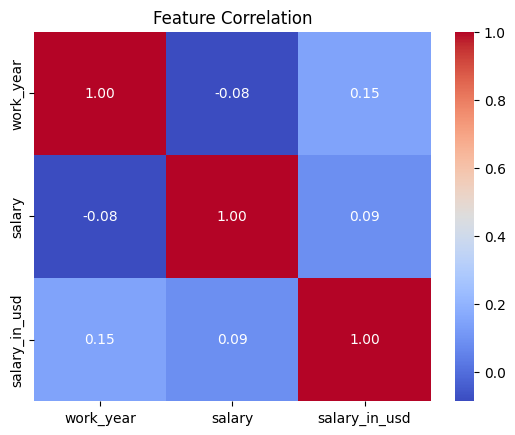

In [44]:
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()


In [47]:
df_numeric = df_numeric.fillna(0)  # Replace NaNs with 0
corr_matrix = df_numeric.corr()


In [48]:
df_numeric = df_numeric.dropna()  # Drop rows with NaN values
corr_matrix = df_numeric.corr()


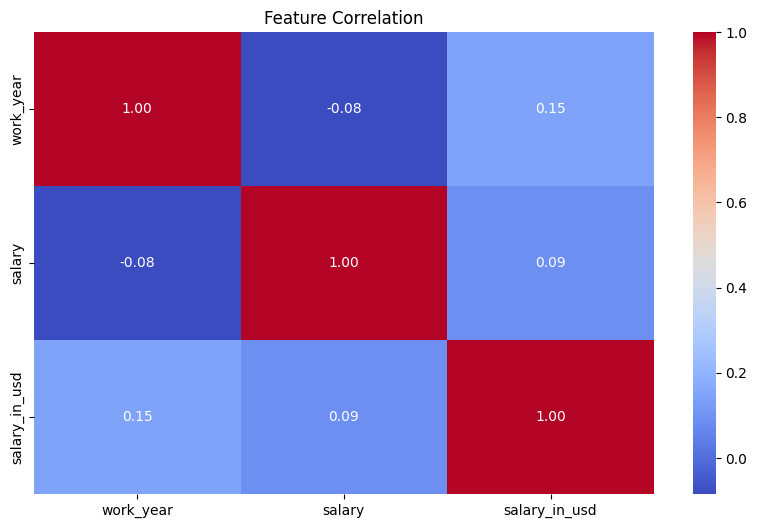

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()


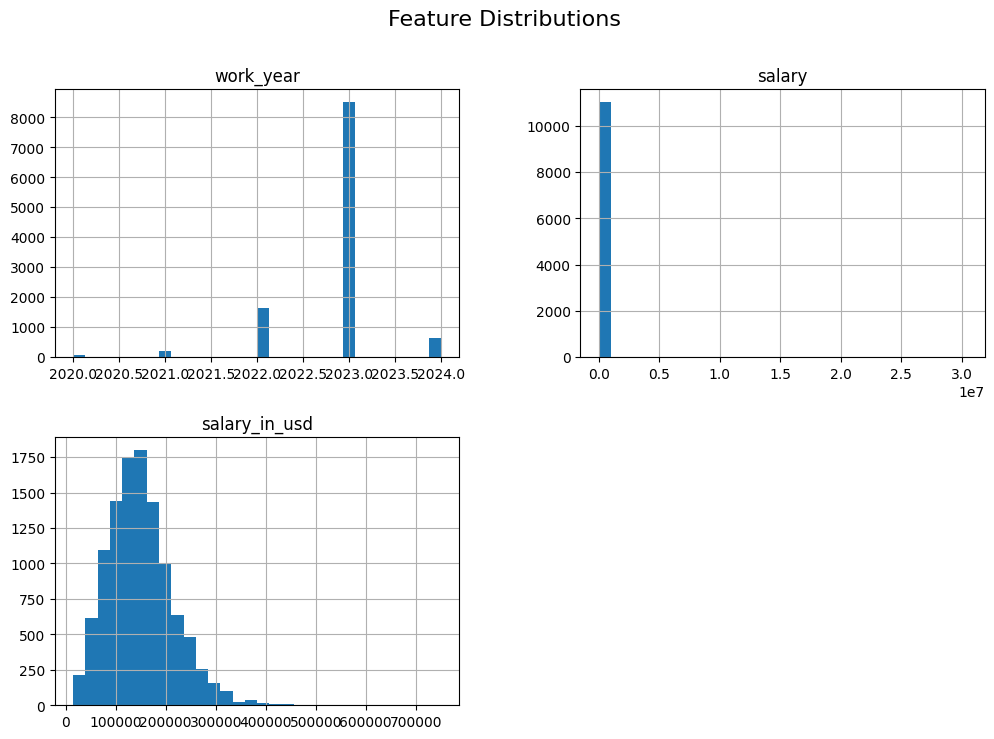

In [50]:
# Histogram for numerical features
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


In [52]:
print(df.columns)


Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')


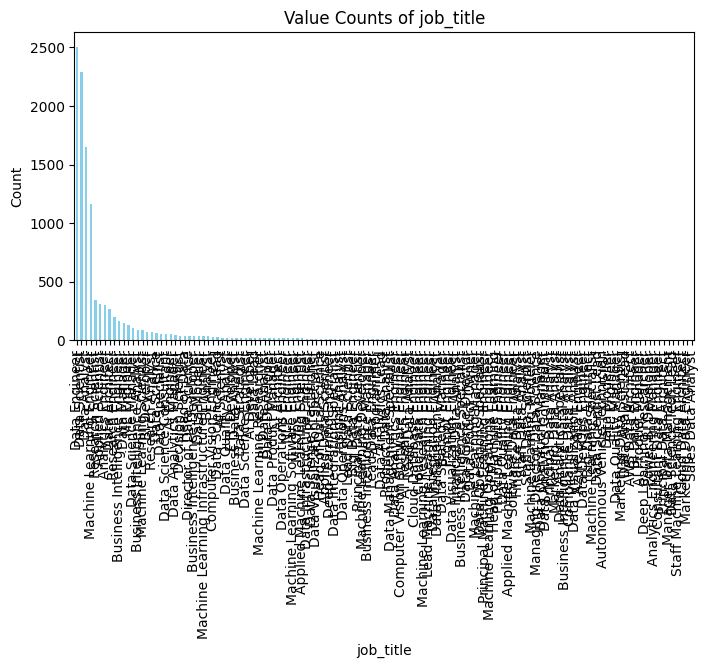

In [53]:
categorical_col = "job_title" 
df[categorical_col].value_counts().plot(kind="bar", figsize=(8,4), color="skyblue")
plt.title(f"Value Counts of {categorical_col}")
plt.ylabel("Count")
plt.xlabel(categorical_col)
plt.show()
